# Exercise 2

## Introduction 

In this exercise we use the data from the AHATS (Advection Horizontal Array Turbulence Study) measurement campaign that took place in Kettleman city, California, over a period of 2 months in 2008.  The area surrounding the site was flat and horizontally homogeneous. Although AHATS belongs to one of the horizontal array studies, we will look at the data from the 8m turbulence tower with multiple measurement levels, but we focus here only on the highest measurement level at 8.05 m. The data covers period of several days in July 2008 (14 – 18). 
Although it is common to use UTC, here we use the local time instead. The time zone is Pacific Daylight Time and is -8h from UTC.

The data archive Ex_2_data.zip contains three different types of data:
- MEAN QUANTITIES: The file data_ahats_mean.txt contains time series of incoming shorwave radiation ($W m^{-2}$), net radiation ($W m^{-2}$), temperature ($^{\circ}C$) at 2 m, wind speed ($m s^{-1}$) at 2 m, and relative humidity at 2 m. The time series contain 1-min values.
- SOUNDINGS: The files data_ahats_sounding*.txt contain radiosoundings operated during the measurement campaign. The data include pressure ($hPa$), height above ground ($m$), potential temperature ($K$), relative humidity ($\%$), wind speed ($m s^{-1}$) and wind direction ($^{\circ}$) The time of each radiosounding is given in the file name and is also given in local time.
- TURBULENCE DATA: The file data_ahats_raw.txt contains raw time series of the velocity components u, v and w ($m s^{-1}$) and temperature T ($K$) at 8.05 m above the ground. The time series have a temporal resolution of 20 $H_z$ or $s^{-1}$.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta
import xarray as xr

In [2]:
# ---- data paths ----
path_mean = 'Ex_2_data/data_ahats_mean.csv'
path_20Hz = 'Ex_2_data/data_ahats_raw.nc'
radiosound_1 = 'Ex_2_data/data_ahats_sounding_20080714_14.csv'

In [3]:
# ---- define colorscheme ----
moonrise = ["#EE5C42", "#EEAD0E", "#6E8B3D", "#008B8B", "#2F4F4F", "#68228B"]

In [4]:
# ---- define constants ----
k = 0.4 # von Karman constant
g = 9.81 
# ---- Frequency of sonic measurements in Hz ---- 
z = 8.05 # height of the sonic anemometer
timestep_Hz = 20

# 2.1: Atmospheric Conditions 

Use the mean data and the radio-soundingsto characterize the weather conditions during the period we are focusing on:

**1.	Plot the diurnal cycle of net radiation, 2-m temperature and relative humidity, and 2-m wind speed to characterize and discuss the atmospheric conditions during this day.**
- **What type of boundary layer do you expect to form under these conditions?**
- **What type of boundary layer is present during which periods of time?**


In [5]:
# ---- Read in data ----
df = pd.read_csv(path_mean)

In [6]:
df.head() 

,yyyy,mm,dd,HH,MM,SS,INSHORT,NETRAD,RH02,U02,T02
0,2008,7,14,0,0,0,-2.4088,-44.784000,52.431000,2.5784,27.702000
1,2008,7,14,0,1,0,-2.4260,-44.784000,52.210999,2.1946,27.714001
2,2008,7,14,0,2,0,-2.4776,-44.987999,51.643002,2.1276,27.635000
3,2008,7,14,0,3,0,-2.6841,-46.055000,52.285999,3.0455,27.459000
4,2008,7,14,0,4,0,-2.9938,-46.257999,53.742001,2.5686,27.252001


In [7]:
# ---- Create date column from year, month, day, hour, minute, second columns in df ----
df['date'] = pd.to_datetime(dict(year=df.yyyy, month=df.mm, day=df.dd, hour=df.HH, minute=df.MM, second=df.SS))

In [8]:
# ---- Drop the columns from which you created the date ----
df.drop(['yyyy', 'mm', 'dd', 'HH', 'MM', 'SS'], axis=1, inplace=True)

In [9]:
# ---- Set date column as index (makes it easier to plot later) ----
df.set_index('date', inplace=True)

In [10]:
df.head()

,INSHORT,NETRAD,RH02,U02,T02
date,,,,,
2008-07-14 00:00:00,-2.4088,-44.784000,52.431000,2.5784,27.702000
2008-07-14 00:01:00,-2.4260,-44.784000,52.210999,2.1946,27.714001
2008-07-14 00:02:00,-2.4776,-44.987999,51.643002,2.1276,27.635000
2008-07-14 00:03:00,-2.6841,-46.055000,52.285999,3.0455,27.459000
2008-07-14 00:04:00,-2.9938,-46.257999,53.742001,2.5686,27.252001


Text(0, 0.5, 'Temperature [°C]')

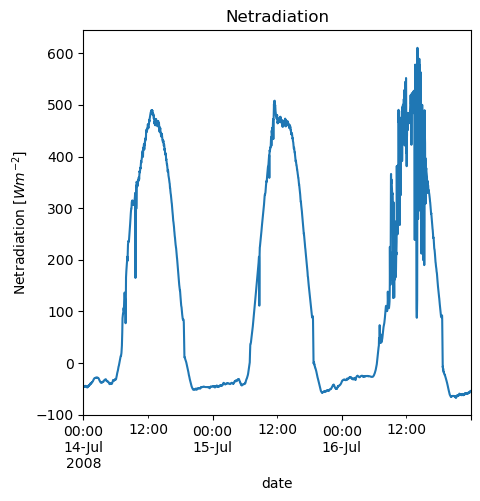

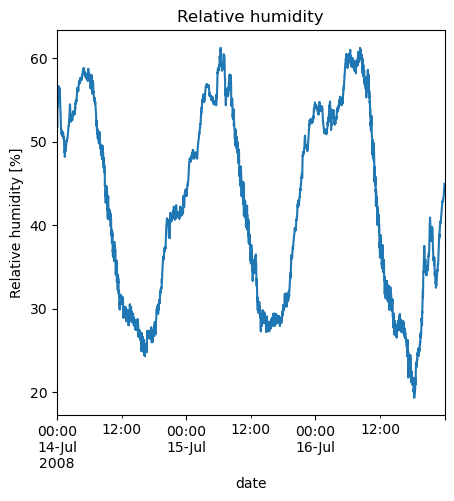

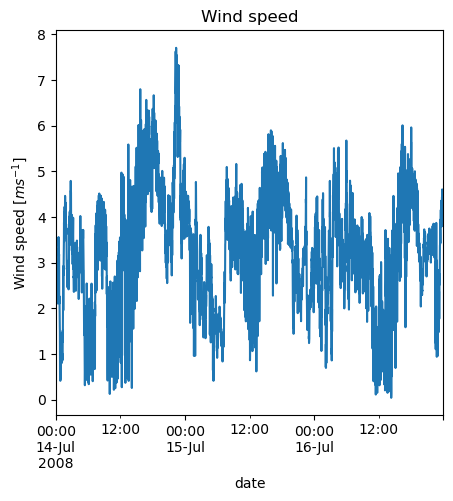

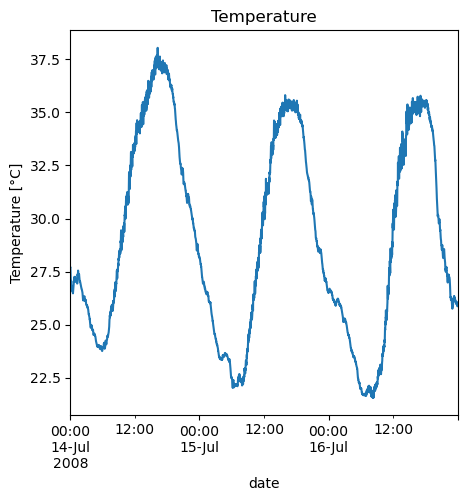

In [11]:
plt.figure(figsize = [5, 5])
df.NETRAD.plot()
plt.title('Netradiation')
plt.ylabel('Netradiation [$W m^{-2}$]')

plt.figure(figsize = [5, 5])
df.RH02.plot()
plt.title('Relative humidity')
plt.ylabel('Relative humidity [%]')

plt.figure(figsize = [5, 5])
df.U02.plot()
plt.title('Wind speed')
plt.ylabel('Wind speed [$m s^{-1}$]')

plt.figure(figsize = [5, 5])
df.T02.plot()
plt.title('Temperature')
plt.ylabel('Temperature [°C]')

Interpretation: 
In the night there is always a stable boundary layer and during the day a convective boundary layer. 

**2. Plot the potential temperature, relative humidity, and wind speed profiles from the radio soundings.**
- **Describe the vertical structure in the soundings and identify the different layers of the daytime (convective) and nighttime (stable) boundary layer**
- **Do the soundings agree with what you learned in class/find in a textbook?**
- **What is the CBL height on the different days?**
- **What could be the cause of the differences?**

In [12]:
# ---- Read in the radiosounding files ----
df_1 = pd.read_csv(radiosound_1)

,Pres,Height,Theta,RH,Wspd,Dir
0,1003.307356,40,NaN,29.000187,2.995447,334.169866
1,1002.536615,50,308.158917,29.663261,3.510850,336.508702
2,1001.380563,60,307.745516,30.459514,4.074286,338.487143
3,1000.434423,70,307.480957,31.261314,4.609206,340.095134
4,999.371838,80,307.354759,32.052219,5.071331,341.222441
...,...,...,...,...,...,...
392,636.659664,3960,316.461760,70.354706,4.662185,41.154986
393,636.051394,3970,316.465916,70.602767,4.607386,40.852004
394,635.265733,3980,316.484717,70.857133,4.554067,40.512867
395,634.347857,3990,316.511107,71.187857,4.540000,39.974524


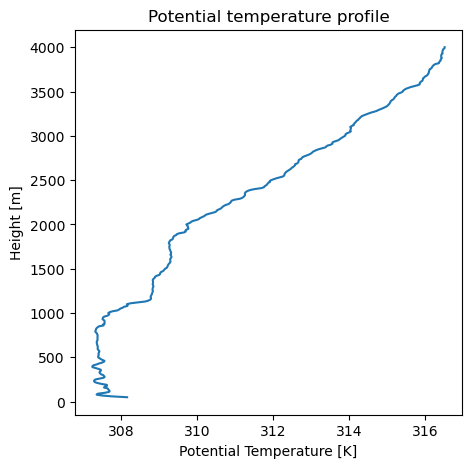

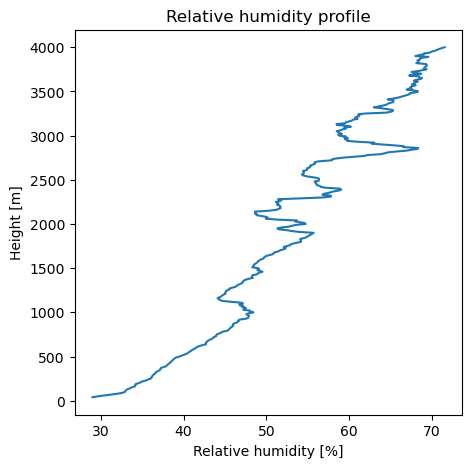

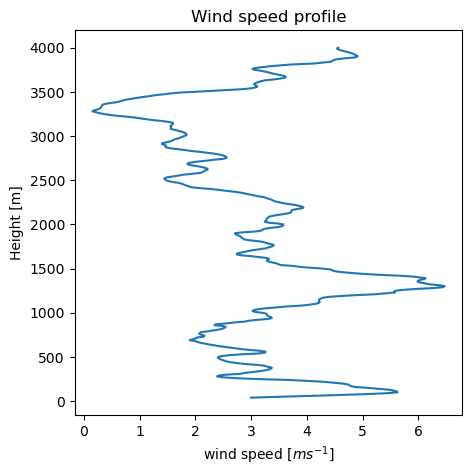

In [13]:
plt.figure(figsize = [5, 5])
plt.plot(df_1.Theta, df_1.Height)
plt.title('Potential temperature profile')
plt.xlabel('Potential Temperature [K]')
plt.ylabel('Height [m]')

plt.figure(figsize = [5, 5])
plt.plot(df_1.RH, df_1.Height)
plt.title('Relative humidity profile')
plt.xlabel('Relative humidity [%]')
plt.ylabel('Height [m]')

plt.figure(figsize = [5, 5])
plt.plot(df_1.Wspd, df_1.Height)
plt.title('Wind speed profile')
plt.xlabel('wind speed [$m s^{-1}$]')
plt.ylabel('Height [m]')

df_1

Interpretation: 
DAYTIME 
Boundary layer till around 1200 m. Afterwards free atmosphere (seen at stable stratification).
From 1000 to 1200 m Entrainment zone (seen at strong stable stratification, strong positive gradient in wind speed).
Mixed layer from 100 to 1000 m (seen at strong unstable stratification underneath, strongly increasing wind speed).
HUMIDITY: should normally decrease with height but is now increasing till 4000 m above ground (maybe due to humidity advection from the              sea and cloud formation). 



# 2.2: Turbulence data analysis

Use the raw eddy covariance data from the sonic anemometer at 8.05 m. Before we can look at turbulence we have to do Reynolds decomposition and averaging, and also rotate the data into streamline coordinates.

**1. What is the correct averaging time XX-min?**

In [14]:
# ---- define the averaging window ----
average = '30min'
ave = 30 # .. put the number of minutes

Split the time series into XX-min intervals, and compute the corresponding mean values, i.e., $\overline{u_{0}}$,  $\overline{v_{0}}$,  $\overline{w_{0}}$, and  $\overline{T_{0}}$, for each of the intervals.

In [15]:
#  ---- Read in the raw 20Hz data ----
df_raw = xr.open_dataset(path_20Hz).to_dataframe()


In [16]:
# ---- Define variables with 20Hz frequency ----
T0 = df_raw['T']
u0 = df_raw.u 
v0 = df_raw.v
w0 = df_raw.w

In [17]:
# ---- Resample from 20Hz to XXmin ----
df_average = df_raw.resample(average).mean()

# ---- Save mean XXmin values ----
T0m = df_average['T']
u0m = df_average.u
v0m = df_average.v
w0m = df_average.w

Compute the mean wind components in so-called streamline coordinates ($\overline{u_{2}}$, $\overline{v_{2}}$, $\overline{w_{2}}$) (Kaimal and Finnigan, 1994, p. 235), i.e., in a coordinate system in which the x-axis is aligned with the mean wind direction in each interval. In this system of coordinates, $\overline{v_{2}}$ = 0 and $\overline{w_{2}}$ = 0. 

This is a common procedure in the evaluation of sonic anemometer data. Alignment with the mean wind can be achieved by applying two rotations. Following Harrison (2015, p. 244), the first rotation about the vertical axis is defined by:
$$
\begin{pmatrix}
\overline{u_{1}} \\ \overline{v_{1}} \\ \overline{w_{1}}
\end{pmatrix} = 
\begin{pmatrix}
\overline{u_{0}} cos(A) + \overline{v_{0}} sin(A) \\
-\overline{u_{0}} sin(A) + \overline{v_{0}} cos(A) \\
\overline{w_{0}}
\end{pmatrix}
$$
where
$$ tan𝐴 = \frac{\overline{v_{0}}}{\overline{u_{0}}}$$
and the second rotation about the new horizontal axis is defined by
$$
\begin{pmatrix}
\overline{u_{2}} \\ \overline{v_{2}} \\ \overline{w_{2}}
\end{pmatrix} = 
\begin{pmatrix}
\overline{u_{1}} cos(B) + \overline{w_{1}} sin(B) \\
\overline{v_{1}} \\
-\overline{u_{1}} sin(B) + \overline{w_{1}} cos(B) 
\end{pmatrix}
$$
where
$$ tanB = \frac{\overline{w_{1}}}{\sqrt{\overline{u_{1}}^2 + \overline{v_{1}}^2}} = \frac{\overline{w_{0}}}{\sqrt{\overline{u_{0}}^2 + \overline{v_{0}}^2}}$$

Note that the angles of rotation are defined with respect to the XX-min mean components, but
the rotation itself is applied to the 20 Hz data.

In [18]:
# ---- full window length to 20Hz function ----
# To calculate the rotated wind variables we must have the angles and the data on the same timestep. As the angles as calculated with the mean values
# we need to convert the data to the 20Hz step again (with the same value over full window length "XX-min" intervals)

window = ave*60*timestep_Hz

def convert(data): 
    # upsample from average data to 20Hz (the upsampled time steps will be NaNs)
    data = data.resample('50L').mean()
    # add the last averaging window manually as pandas is stopping at the last index
    data = pd.concat([data, pd.Series(data=None, index = pd.date_range(start=data.index[-1], periods=window, freq='50L'), dtype=np.float32)])
    # interpolate the NaN values with pad, which uses the known values to fill in NaNs
    data.interpolate(method='pad', inplace=True)
    
    return data

In [19]:
# ---- Perform Double Rotation ----
# Calculate angle A to rotate in the horizontal
anglA = np.arctan2(v0m, u0m)
# Interpolate angle A to 20Hz frequency by filling it with 1 value for every 30min with the convert() function ----
anglA = convert(anglA)

C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)


In [20]:
# ---- Rotate the wind vectors according to the equations above ----
u1 = u0 * np.cos(anglA) + v0 * np.sin(anglA)
v1 = -u0 * np.sin(anglA) + v0 * np.cos(anglA)
w1 = w0 

In [21]:
# Calculate angle B to rotate in the vertical
anglB = np.arctan2(w0m, np.sqrt(u0m**2 + v0m**2))

In [22]:
# Interpolate angle B to 20Hz  frequency by filling it with 1 value for every 30min with the convert() function ----
anglB = convert(anglB)

C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)


In [23]:
# ---- Rotate the wind vectors according to the equations above ----
u2 = u1 * np.cos(anglB) + w1 * np.sin(anglB)
v2 = v1 
w2 = -u1 * np.sin(anglB) + w1 * np.cos(anglB)

In [24]:
# --- Compute the mean 30min values for rotated velocity components u2, v2 and w2 ---
u2m = u2.resample(average).mean()
v2m = v2.resample(average).mean() 
w2m = w2.resample(average).mean()

**2.
Plot the averaged time series of $\overline{T_{0}}$, $\overline{u_{0}}$, $\overline{v_{0}}$, $\overline{w_{0}}$, $\overline{u_{2}}$, $\overline{v_{2}}$, $\overline{w_{2}}$** 
- **Check your calculations by verifying that $\overline{v_{2}}$ = 0 and $\overline{w_{2}}$ = 0. For all other exercises, 𝑢, 𝑣, and 𝑤 always refer to the rotated $u_{2}$, $v_{2}$, $w_{2}$.**

Text(0, 0.5, 'Wind speed [$m s^{-1}$]')

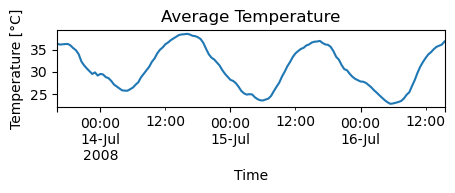

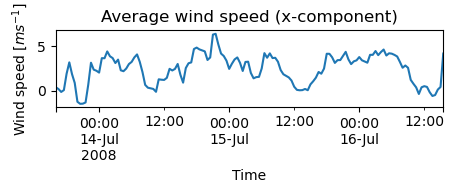

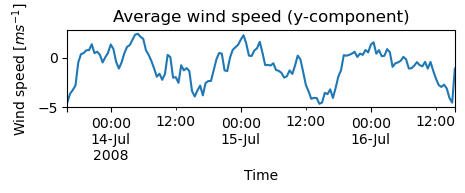

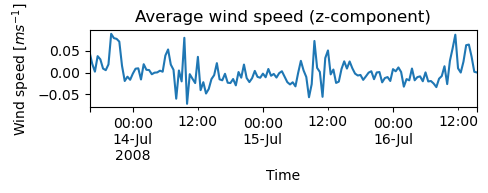

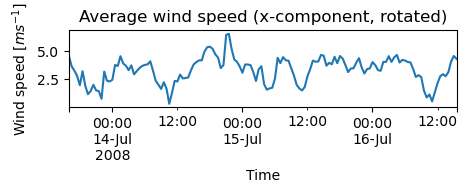

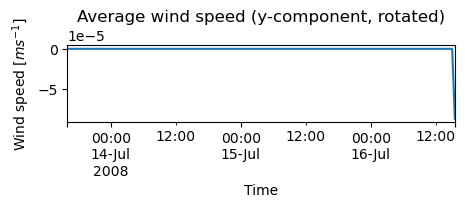

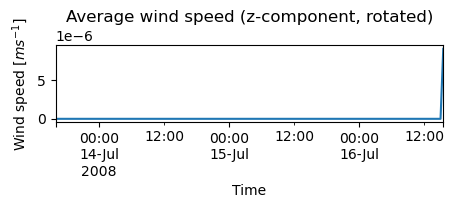

In [25]:
plt.figure(figsize = [5, 1])
T0m.plot()
plt.title('Average Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Non-rotated things
plt.figure(figsize = [5, 1])
u0m.plot()
plt.title('Average wind speed (x-component)')
plt.xlabel('Time')
plt.ylabel('Wind speed [$m s^{-1}$]')

plt.figure(figsize = [5, 1])
v0m.plot()
plt.title('Average wind speed (y-component)')
plt.xlabel('Time')
plt.ylabel('Wind speed [$m s^{-1}$]')

plt.figure(figsize = [5, 1])
w0m.plot()
plt.title('Average wind speed (z-component)')
plt.xlabel('Time')
plt.ylabel('Wind speed [$m s^{-1}$]')

# Rotated things
plt.figure(figsize = [5, 1])
u2m.plot()
plt.title('Average wind speed (x-component, rotated)')
plt.xlabel('Time')
plt.ylabel('Wind speed [$m s^{-1}$]')

plt.figure(figsize = [5, 1])
v2m.plot()
plt.title('Average wind speed (y-component, rotated)')
plt.xlabel('Time')
plt.ylabel('Wind speed [$m s^{-1}$]')

plt.figure(figsize = [5, 1])
w2m.plot()
plt.title('Average wind speed (z-component, rotated)')
plt.xlabel('Time')
plt.ylabel('Wind speed [$m s^{-1}$]')

# 2.3: Computing turbulent fluxes

Compute the turbulent perturbations as the deviations of each variable from its mean computed over the window of size XXmin

**1. For each of the XX-min interval compute the dynamic sensible heat flux $\rho C_p \overline{w'T'}$. Assume that the density is $1.2 kg m^{-3}$**
- **Discuss the daily cycle of heat flux in relation to the meteorological conditions from Problem 2.1.** 
- **What is the maximum value of the sensible heat flux and how does it relate to the net radiation?**

C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)
C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)


Text(0, 0.5, 'Sensible heat flux [$W m^{-2}$]')

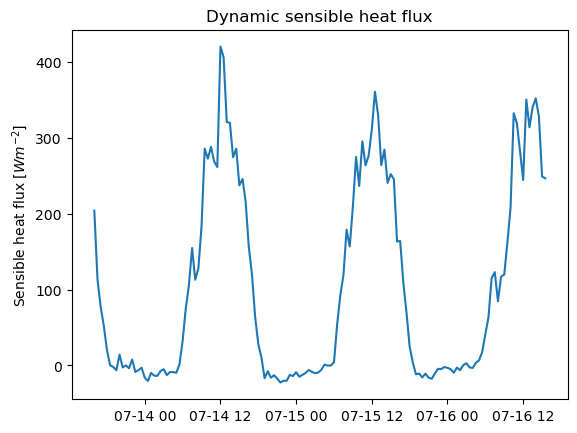

In [26]:
#  ---- Define density ----
rho = 1.2
Cp = 1004

# ---- Convert XXmin means to 20 Hz dataset ----
w2m_resampled = convert(w2m)

# ---- Define the turbulence perturbations as the deviation of each variable from its mean ----
w_prime = w2 - w2m_resampled
T0m_converted = convert(T0m)

T_prime = T0 - T0m_converted
wT_prime = w_prime*T_prime
wT_prime_mean = wT_prime.resample(average).mean()

# ----- Compute the kinematic sensible heat flux
H = rho*Cp*wT_prime_mean
plt.plot(H)
plt.title('Dynamic sensible heat flux')
plt.ylabel('Sensible heat flux [$W m^{-2}$]')

Interpretation: Strong sensible heat flux during the day, because of strong shortwave radiation and low humidity on the ground. 
In the night moist air, so that condensation releases a lot of heat at the surface. Therefore no strong gradients between ground and air temperature => low sensible heat flux

**2. For each of the XX-min interval compute the horizontal momentum fluxes (xz and yz-components of the Reynolds stress) in the rotated coordinate system (i.e., $−\rho\overline{u'w'}$ and $−\rho\overline{v'w'}$). Assume that the density is $1.2 kg m^{-3}$**
- **What is the diurnal cycle of the horizontal momentum fluxes?**
- **Which of the two Reynolds stress components is dominant, and why?**
- **Compute the friction velocity $u_{*}$ and compare the values calculated with $u_{*} = (\overline{u'w'}^2 + \overline{v'w'}^2)^{1/4}$ and without the contribution from the lateral momentum flux $u_{*} = (\overline{u'w'}^2)^{1/4}$**

C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)
C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)


Text(0, 0.5, 'Horizontal momentum flux [kg $m^{-2}$ $s^{-1}$]')

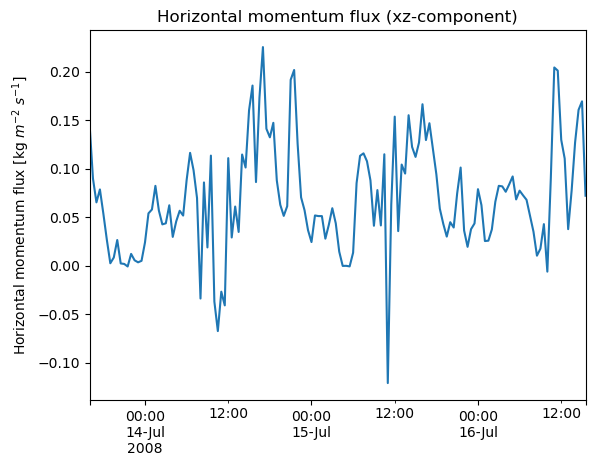

In [27]:
#  ---- Define density ----
rho = 1.2

# ---- Convert XXmin means to 20 Hz dataset ----
w2m_resampled = convert(w2m)

# ---- Define the turbulence perturbations as the deviation of each variable from its mean ----
w_prime = w2 - w2m_resampled
u2m_converted = convert(u2m)

u_prime = u2 - u2m_converted
uw_prime = w_prime*u_prime
uw_prime_mean = uw_prime.resample(average).mean()

# ----- Compute the kinematic sensible heat flux
hor_mom_flux_x = - rho*uw_prime_mean
hor_mom_flux_x.plot()
plt.title('Horizontal momentum flux (xz-component)')
plt.ylabel('Horizontal momentum flux [kg $m^{-2}$ $s^{-1}$]')

Interpretation: We have strong horizontal momentum flux during the day (transport of horizontal momentum to the vertical == transport of vertical momentum to the horizontal). xz - component bigger than the yz - component, because coordinate system is rotated into the x-direction. 

C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)
C:\Users\flori\AppData\Local\Temp\ipykernel_6180\130780810.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.interpolate(method='pad', inplace=True)


Text(0, 0.5, 'Horizontal momentum flux [kg $m^{-2}$ $s^{-1}$]')

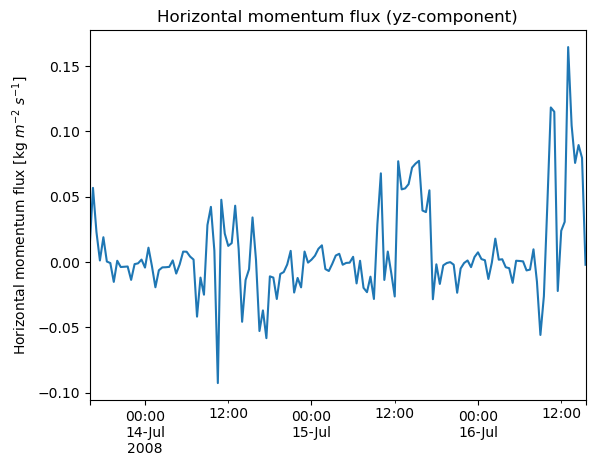

In [28]:
#  ---- Define density ----
rho = 1.2

# ---- Convert XXmin means to 20 Hz dataset ----
w2m_resampled = convert(w2m)

# ---- Define the turbulence perturbations as the deviation of each variable from its mean ----
w_prime = w2 - w2m_resampled
v2m_converted = convert(v2m)

v_prime = v2 - v2m_converted
vw_prime = w_prime*v_prime
vw_prime_mean = vw_prime.resample(average).mean()

# ----- Compute the kinematic sensible heat flux
hor_mom_flux_y = - rho*vw_prime_mean
hor_mom_flux_y.plot()
plt.title('Horizontal momentum flux (yz-component)')
plt.ylabel('Horizontal momentum flux [kg $m^{-2}$ $s^{-1}$]')

Text(0, 0.5, '$u_*$ [m $s^{-1}$]')

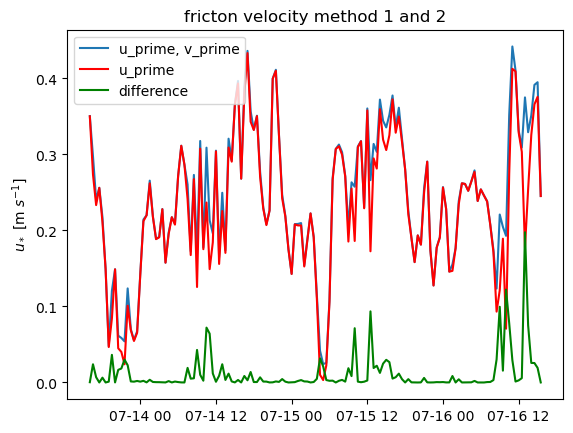

In [29]:
u_star_1 = (uw_prime_mean**2 + vw_prime_mean**2)**(1/4)
u_star_2 = (uw_prime_mean**2)**(1/4)

plt.plot(u_star_1, label = 'u_prime, v_prime')
plt.title('fricton velocity method 1 and 2')

plt.plot(u_star_2, color = 'r', label = 'u_prime')
u_diff = u_star_1 - u_star_2

plt.plot(u_diff, color = 'green', label = 'difference')
plt.legend(loc = 'best')
plt.ylabel('$u_*$ [m $s^{-1}$]')

**3.Compute the $TKE = \frac{1}{2} (\overline{u'^2} + \overline{v'^2} + \overline{w'^2})$.**
- **What is the diurnal cycle of TKE and what is the dominant process that governs the TKE (how does it relate to the mean meteorological conditions)?**
- **By comparing them to the values of mean wind speed $\overline{u}$ establish a “rule of thumb” for estimating $u_{*}$ from the mean wind speed** 

Text(0, 0.5, 'Temperature [°C]')

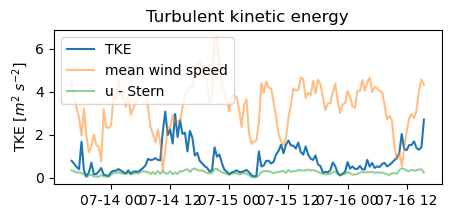

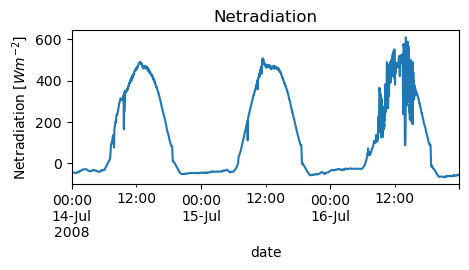

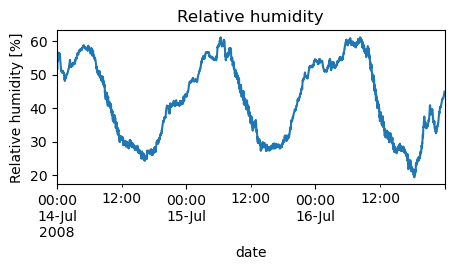

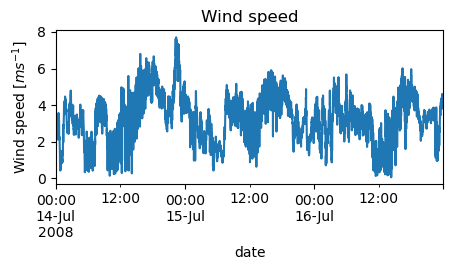

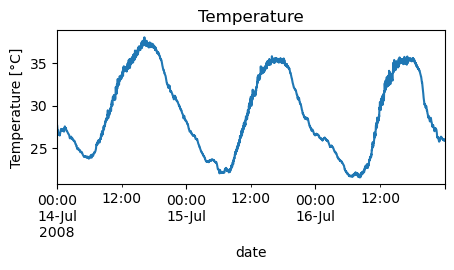

In [30]:
plt.figure(figsize = [5, 2])
square = u_prime**2 + v_prime**2 + w_prime**2
TKE = (1/2) * square.resample(average).mean()
plt.plot(TKE, label = 'TKE')
plt.title('Turbulent kinetic energy')
plt.plot(u2m, label = 'mean wind speed', alpha = 0.5)
plt.plot(u_star_1, label = 'u - Stern', alpha = 0.5)
plt.legend()
plt.ylabel('TKE [$m^{2}$ $s^{-2}$]')

plt.figure(figsize = [5, 2])
df.NETRAD.plot()
plt.title('Netradiation')
plt.ylabel('Netradiation [$W m^{-2}$]')

plt.figure(figsize = [5, 2])
df.RH02.plot()
plt.title('Relative humidity')
plt.ylabel('Relative humidity [%]')

plt.figure(figsize = [5, 2])
df.U02.plot()
plt.title('Wind speed')
plt.ylabel('Wind speed [$m s^{-1}$]')

plt.figure(figsize = [5, 2])
df.T02.plot()
plt.title('Temperature')
plt.ylabel('Temperature [°C]')

Maximum a little after noon. Maxima are pretty similar to the maxima of the dynamic sensible heat flux. Makes sense because a strong sensible heat flux creates strong buojancy and therefore strong mixing (turbulent kinetic energy). 

Rule of thumb: ???


**4. Test the validity of Taylor’s hypothesis.** 
- **During which periods is it valid?**
- **What is characteristic of the periods when it is not valid?**

Text(0, 0.5, 'dimensionslos')

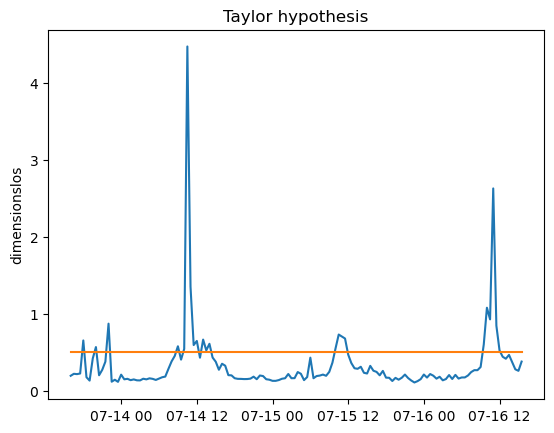

In [38]:
taylor = np.sqrt(TKE) / u2m 
y = 0.5
plt.plot(taylor)
plt.plot(taylor.index.values,[y]*len(taylor))
plt.title('Taylor hypothesis')
plt.ylabel('dimensionslos')

Bei Vergrößerung des Mittelungsintervalls sind die Werte eher unter 0,5 (also valid). Allerdings können dann auch schon synoptische Ereignisse darauf Einfluss nehmen. 


# 2.4: Turbulence characteristics

**1. Compute the skewness of vertival velocity $\overline{w'^3}$.**
- **What is the skewness during the daytime and how does it relate to the expected values we talked about in the class?**
- **Plot the histograms of one period with positively and and one with negatively skewed distribution. What is the mean, the median and the mode of these two periods?**

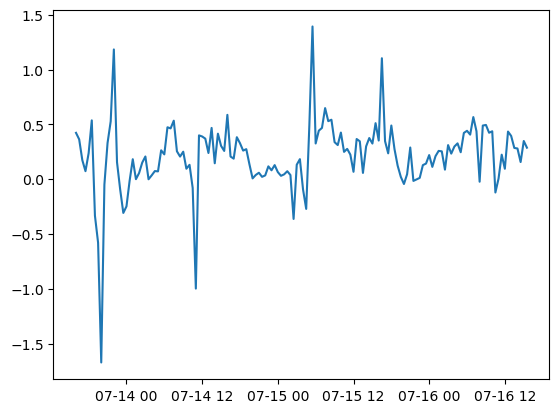

In [40]:
skewness_1 = w_prime**3  # relative to what? => (standard deviation)^2 ???
skewness_2 = w_prime**2
skewness_1_fin = skewness_1.resample(average).mean()
skewness_2_fin = (skewness_2.resample(average).mean())**(3/2)
skewness = skewness_1_fin / skewness_2_fin
plt.plot(skewness)


<Axes: >

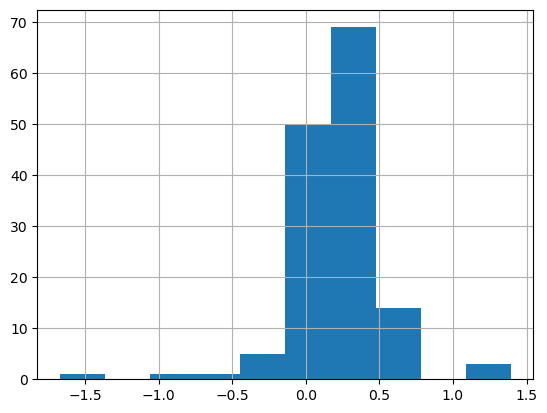

In [41]:
skewness.hist()

**2.	Quadrant analysis: Find an averaging period with the maximum positive and maximum negative sensible heat flux and plot the quadrants for those periods**
- **Which quadrants dominate in cases of positive heat flux and which in cases of negative heat flux? And what does this tell us about the characteristics of turbulence eddies?**
- **What is the contribution of the counter-gradient fluxes to the total flux?**
